In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split

from tqdm import trange

plt.style.use('seaborn-darkgrid')
mpl.rcParams['figure.figsize'] = [10.0, 4.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 12

In [2]:
def accuracy_score(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred) / len(Y_test)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [3]:
class LogReg():
    def initialize_params(self, X, Y, epochs, lr):
        self.cost = np.zeros(epochs)
        self.X, self.Y, self.epochs, self.lr = X, Y, epochs, lr
        self.nr_datapoints, self.nr_params = self.X.shape[0], self.X.shape[1]
        self.w, self.b = np.zeros((1, self.nr_params)), 0

    def fit(self, X, Y, epochs, lr):
        self.initialize_params(X, Y, epochs, lr)
        for i in trange(epochs):
            dw, db, cost = self.optimize()
            self.w -= lr*dw.T
            self.b -= lr*db
            self.cost[i] = cost
            
    def optimize(self):
        w, b, X, Y, Y_T = self.w, self.b, self.X, self.Y, self.Y.T        
        # Predict results
        Y_pred = sigmoid(np.dot(w, X.T) + b)
        cost = -1/self.nr_datapoints*(np.sum((Y_T*np.log(Y_pred)) + ((1 - Y_T)*(np.log(1 - Y_pred)))))
        # Gradients
        dw = 1/self.nr_datapoints*(np.dot(X.T, (Y_pred-Y_T).T))
        db = 1/self.nr_datapoints*(np.sum(Y_pred-Y_T))        
        return dw, db, cost

    def predict(self, X_test):
        Y_pred = sigmoid(np.dot(self.w, X_test.T) + self.b)
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        return Y_pred

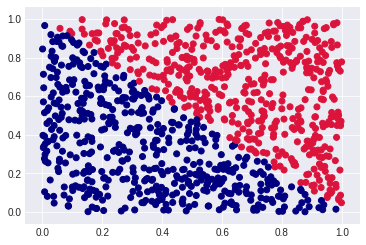

In [6]:
nr_datapoints = 1000
X = np.random.uniform(0, 1, (nr_datapoints, 2))
Y = np.where(X[:,0]+X[:,1] > 1.0, 1, 0)
#X += np.random.uniform(-0.5, 0.5, (nr_datapoints, 2))
plt.scatter(*X.T, c=np.where(Y>0.5, "crimson", "navy"));

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
logreg = LogReg()
logreg.fit(X_train, Y_train, int(1e4), 0.1)

Y_pred = logreg.predict(X_test)
accuracy_score(Y_test, Y_pred)

100%|██████████| 10000/10000 [00:01<00:00, 8975.37it/s]


0.9966666666666667